In [6]:
%pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ----------

<>:13: SyntaxWarning: invalid escape sequence '\i'
<>:13: SyntaxWarning: invalid escape sequence '\i'
C:\Users\admin\AppData\Local\Temp\ipykernel_16208\3106046152.py:13: SyntaxWarning: invalid escape sequence '\i'
  data = pd.read_csv("D:\мои проекты\intensiv4\DADA\categorized_comments.csv", encoding='utf-8')


Файл 'categorized_comments.csv' успешно загружен.
Best parameters: {'estimator__C': 10}
ROC-AUC for speed: 0.993156353450471
ROC-AUC for quality: 0.9979839779298636
ROC-AUC for staff: 0.978244561140285
ROC-AUC for execution: 0.9960492679525912
ROC-AUC for solved: 0.9931678053657724
Mean ROC-AUC: 0.9917203931677967


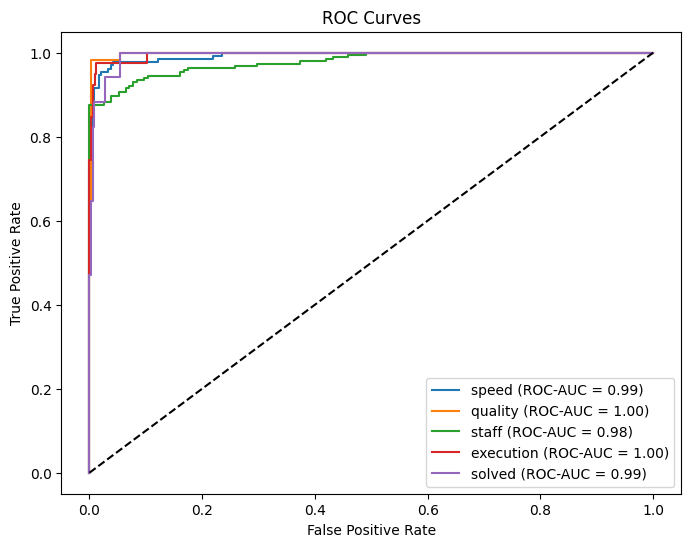

Модель сохранена в файл 'multilabel_model.pkl'


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier  # Исправленный импорт
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

# 1. Загрузка данных
data = None  # Инициализируем data значением None
try:
    data = pd.read_csv("D:\мои проекты\intensiv4\DADA\categorized_comments.csv", encoding='utf-8')
    print("Файл 'categorized_comments.csv' успешно загружен.")
except FileNotFoundError:
    print("Ошибка: Файл 'categorized_comments.csv' не найден. Сначала запусти скрипт категоризации!")
except Exception as e:
    print(f"Ошибка при чтении файла: {e}")

if data is None:
    print("Не удалось загрузить данные. Завершение работы.")
    exit()

# 2. Подготовка данных
# Заполняем пропущенные значения
data['comment'] = data['comment'].fillna('')

# Целевые переменные (категории)
categories = ['speed', 'quality', 'staff', 'execution', 'solved']

# Разделение на признаки (X) и цели (y)
X = data['comment']
y = data[categories]

# 3. Векторизация текста
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

# 4. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 5. Обучение модели
# Logistic Regression
logreg = LogisticRegression(solver='liblinear', random_state=42)
multilabel_classifier = MultiOutputClassifier(logreg)

# Подбор гиперпараметров (пример)
param_grid = {
    'estimator__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(multilabel_classifier, param_grid, scoring='roc_auc', cv=3)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Лучшая модель
best_model = grid_search.best_estimator_

# 6. Оценка модели
# Предсказание вероятностей
y_pred_proba = best_model.predict_proba(X_test)

# Вычисление ROC-AUC для каждой категории
roc_auc = {}
for i, category in enumerate(categories):
    roc_auc[category] = roc_auc_score(y_test[category], y_pred_proba[i][:, 1])
    print(f"ROC-AUC for {category}: {roc_auc[category]}")

# Средний ROC-AUC
mean_roc_auc = sum(roc_auc.values()) / len(roc_auc)
print(f"Mean ROC-AUC: {mean_roc_auc}")

# Визуализация ROC-кривых (пример)
plt.figure(figsize=(8, 6))
for i, category in enumerate(categories):
    fpr, tpr, thresholds = roc_curve(y_test[category], y_pred_proba[i][:, 1])
    plt.plot(fpr, tpr, label=f'{category} (ROC-AUC = {roc_auc[category]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# 7. Сохранение модели
joblib.dump(best_model, 'multilabel_model.pkl')

print("Модель сохранена в файл 'multilabel_model.pkl'")

<>:13: SyntaxWarning: invalid escape sequence '\i'
<>:13: SyntaxWarning: invalid escape sequence '\i'
C:\Users\admin\AppData\Local\Temp\ipykernel_16656\2704775030.py:13: SyntaxWarning: invalid escape sequence '\i'
  data = pd.read_csv("D:\мои проекты\intensiv4\DADA\categorized_comments.csv", encoding='utf-8')  # Загружаем исходный файл


Файл 'coment.csv' успешно загружен.
ROC-AUC for Нравится скорость отработки заявок: 0.9364756604696672
ROC-AUC for Нравится качество выполнения заявки: 0.7220276937768582
ROC-AUC for Нравится качество работы сотрудников: 0.7762977154424523
ROC-AUC for Понравилось выполнение заявки: 0.7036611519607843
ROC-AUC for Вопрос решен: 0.94809375
Mean ROC-AUC: 0.8173111943299525


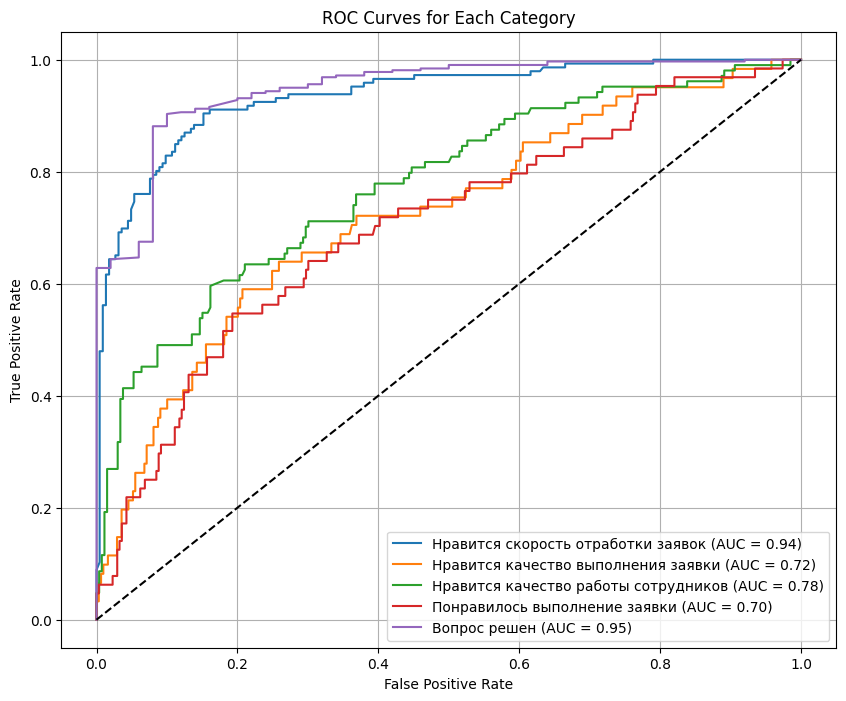

Модель сохранена в файл 'comment_classification_model.pkl'


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt  # Импортируем matplotlib для визуализации

# 1. Загрузка данных
try:
    data = pd.read_csv("D:\мои проекты\intensiv4\DADA\categorized_comments.csv", encoding='utf-8')  # Загружаем исходный файл
    print("Файл 'coment.csv' успешно загружен.")
except FileNotFoundError:
    print("Ошибка: Файл 'coment.csv' не найден.")
    exit()
except Exception as e:
    print(f"Ошибка при чтении файла: {e}")
    exit()

# 2. Подготовка данных
# Проверяем наличие необходимых столбцов
required_columns = ['comment', 'Нравится скорость отработки заявок', 'Нравится качество выполнения заявки', 'Нравится качество работы сотрудников', 'Понравилось выполнение заявки', 'Вопрос решен']
for col in required_columns:
    if col not in data.columns:
        print(f"Ошибка: Столбец '{col}' не найден в файле 'coment.csv'.")
        exit()

# Переименование столбца "Текст комментария" в "comment"
data = data.rename(columns={'Текст комментария': 'comment'})

# Заполняем пропущенные значения в столбце 'comment'
data['comment'] = data['comment'].fillna('')

# Определяем целевые переменные
categories = ['Нравится скорость отработки заявок', 'Нравится качество выполнения заявки', 'Нравится качество работы сотрудников', 'Понравилось выполнение заявки', 'Вопрос решен']

# 3. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data['comment'], data[categories], test_size=0.2, random_state=42)

# 4. Создание пайплайна
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultiOutputClassifier(LogisticRegression(solver='liblinear', random_state=42)))
])

# 5. Обучение модели
pipeline.fit(X_train, y_train)

# 6. Оценка модели
y_pred_proba = pipeline.predict_proba(X_test)

roc_auc = {}
fpr = {}
tpr = {}

# Создаем фигуру для графиков ROC-кривых
plt.figure(figsize=(10, 8))

for i, category in enumerate(categories):
    roc_auc[category] = roc_auc_score(y_test[category], y_pred_proba[i][:, 1])
    fpr[category], tpr[category], _ = roc_curve(y_test[category], y_pred_proba[i][:, 1])

    # Рисуем ROC-кривую для каждой категории
    plt.plot(fpr[category], tpr[category], label=f'{category} (AUC = {roc_auc[category]:.2f})')

    print(f"ROC-AUC for {category}: {roc_auc[category]}")

mean_roc_auc = sum(roc_auc.values()) / len(roc_auc)
print(f"Mean ROC-AUC: {mean_roc_auc}")

# Рисуем диагональную линию (случайный классификатор)
plt.plot([0, 1], [0, 1], 'k--')

# Настраиваем график
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Category')
plt.legend()
plt.grid(True)  # Добавляем сетку для лучшей читаемости

# Отображаем график
plt.show()

# 7. Сохранение модели
joblib.dump(pipeline, 'comment_classification_model.pkl')
print("Модель сохранена в файл 'comment_classification_model.pkl'")